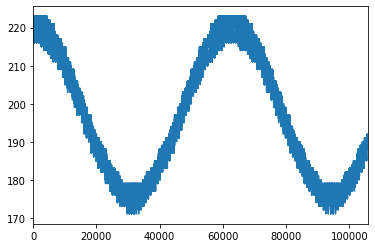

In [69]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt
import pandas as pd
date = pd.read_csv('data.csv')

date.describe()
date_masurate = date['REAL_DATA']
date_masurate.plot.line()
plt.show()

In [70]:
def rolling_window(func, window_size, series):
    output = ['NA']*window_size
    for i in range(window_size,len(series)):
        output.append(func(series[i-window_size:i]))
    return output

In [71]:
date['300_step_ma']=rolling_window(lambda x : sum(x)/len(x), 300, date['REAL_DATA'].tolist())
from matplotlib import pyplot as plt

date = date[date['300_step_ma'] != 'NA']

moving_average = date['300_step_ma'].diff()

In [72]:
import numpy as np
data = np.array(date['300_step_ma'])

import numpy.fft as fft
spectrum = fft.fft(data)

sp = pd.DataFrame()

sp['spectrum'] = spectrum

sp.describe()



,spectrum
count,1.056050e+05+0.000000e+00j
mean,2.221133e+02-5.291355e-14j
std,6.421391e+04+0.000000e+00j
min,-3.229858e+05+2.915435e+05j
25%,1.529335e+01-3.115785e+00j
50%,1.588980e+01+4.634999e+00j
75%,1.649091e+01-3.334706e+01j
max,2.079847e+07+5.945964e-10j


In [80]:
mask = abs(spectrum) < 300
peaks = freq[mask]
plt.plot(peaks)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 38700 but corresponding boolean dimension is 105605

In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

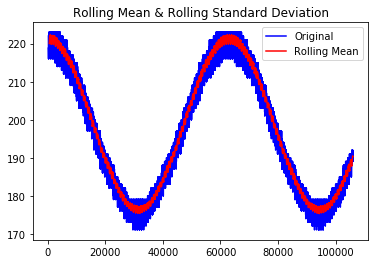

In [77]:
rolling_mean = date['REAL_DATA'].rolling(window = 300).mean()
rolling_std = date['REAL_DATA'].rolling(window = 300).std()
plt.plot(date['REAL_DATA'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

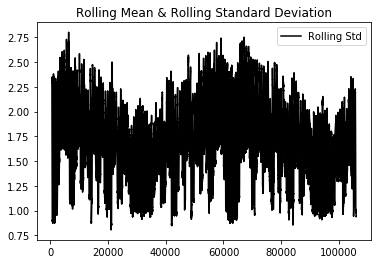

In [78]:
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [79]:
result = adfuller(date['REAL_DATA'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.175465647553238
p-value: 0.21527019161310634
Critical Values:
	1%: -3.4304119507481805
	5%: -2.861567381276006
	10%: -2.566784574092315


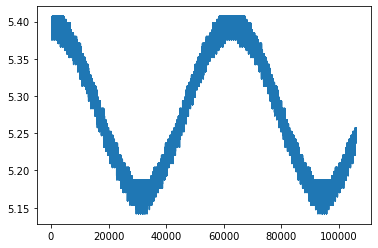

In [81]:
df_log = np.log(date['REAL_DATA'])
plt.plot(df_log)

In [83]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

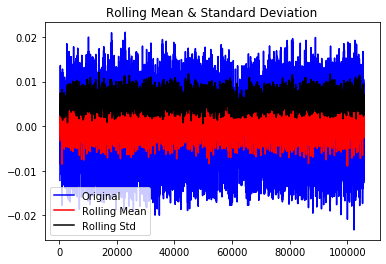

MemoryError: Unable to allocate 44.3 MiB for an array with shape (55, 105524) and data type float64

In [85]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

In [ ]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [68]:
decomposition = seasonal_decompose(df_log,period=300) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MemoryError: Unable to allocate 11.1 GiB for an array with shape (38646, 38646) and data type float64

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)